In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
import seaborn as sns

sorted_by_ig_df = pd.read_csv("/Users/kejiyuan/Desktop/sorted_by_ig1030_time_course.csv", sep="\t")
print(sorted_by_ig_df)

          ig_0      ig_1          start            end
0     0.614707  1.000000   R-MMU-114259   R-MMU-114252
1     0.614707  1.000000   R-MMU-114259   R-MMU-114252
2     0.679466  0.788638  R-MMU-2002460  R-MMU-1650808
3     0.361705  0.661967  R-MMU-1981120  R-MMU-8948231
4     0.240194  0.641409  R-MMU-8956040  R-MMU-8956140
...        ...       ...            ...            ...
8551  0.001952  0.000011  R-MMU-3249390  R-MMU-3249371
8552  0.001952  0.000011  R-MMU-3249390  R-MMU-3249371
8553  0.003027  0.000010  R-MMU-1236398  R-MMU-1977958
8554  0.016466  0.000007  R-MMU-8867041  R-MMU-8867047
8555  0.003435  0.000003   R-MMU-158311   R-MMU-158399

[8556 rows x 4 columns]


In [2]:
extracted_1_percent_df = sorted_by_ig_df['ig_1'].quantile(0.99)
print(extracted_1_percent_df)
top_1_percent_GNN = sorted_by_ig_df[sorted_by_ig_df['ig_1'] >= extracted_1_percent_df]
print(top_1_percent_GNN.shape)
top_1_percent_GNN = top_1_percent_GNN.drop_duplicates(subset=['start'], keep='first')
print(top_1_percent_GNN.shape)

0.1198687932901669
(86, 4)
(65, 4)


In [3]:
ensembl2Reaction_df = pd.read_csv("/Users/kejiyuan/Desktop/reticula/data/GEO_model_training/input/Ensembl2ReactomeReactions.txt", sep='\t',header=None)
combined_ig_gene_df_start = pd.merge(top_1_percent_GNN, ensembl2Reaction_df, left_on="start", right_on=1)
combined_ig_gene_df_start.rename(columns={0: "genes"}, inplace=True)
combined_ig_gene_df_start.drop(columns=[1,2,3,4,5], inplace=True)
print(combined_ig_gene_df_start)

          ig_0      ig_1         start           end               genes
0     0.614707  1.000000  R-MMU-114259  R-MMU-114252  ENSMUSG00000019979
1     0.614707  1.000000  R-MMU-114259  R-MMU-114252  ENSMUSG00000028914
2     0.614707  1.000000  R-MMU-114259  R-MMU-114252  ENSMUSG00000058927
3     0.614707  1.000000  R-MMU-114259  R-MMU-114252  ENSMUSG00000063694
4     0.614707  1.000000  R-MMU-114259  R-MMU-114252  ENSMUSP00000020157
...        ...       ...           ...           ...                 ...
8407  0.075990  0.120225  R-MMU-187575  R-MMU-187574  ENSMUST00000170901
8408  0.075990  0.120225  R-MMU-187575  R-MMU-187574  ENSMUST00000197238
8409  0.075990  0.120225  R-MMU-187575  R-MMU-187574  ENSMUST00000198320
8410  0.075990  0.120225  R-MMU-187575  R-MMU-187574  ENSMUST00000204807
8411  0.075990  0.120225  R-MMU-187575  R-MMU-187574  ENSMUST00000233296

[8412 rows x 5 columns]


In [20]:
combined_ig_gene_df_end = pd.merge(top_1_percent_GNN, ensembl2Reaction_df, left_on="end", right_on=1)
combined_ig_gene_df_end.rename(columns={0: "genes"}, inplace=True)
combined_ig_gene_df_end.drop(columns=[1,2,3,4,5], inplace=True)
print(combined_ig_gene_df_end)

          ig_0      ig_1         start           end               genes
0     0.614707  1.000000  R-MMU-114259  R-MMU-114252  ENSMUSG00000019979
1     0.614707  1.000000  R-MMU-114259  R-MMU-114252  ENSMUSG00000025860
2     0.614707  1.000000  R-MMU-114259  R-MMU-114252  ENSMUSG00000028914
3     0.614707  1.000000  R-MMU-114259  R-MMU-114252  ENSMUSG00000031628
4     0.614707  1.000000  R-MMU-114259  R-MMU-114252  ENSMUSG00000058927
...        ...       ...           ...           ...                 ...
6346  0.075990  0.120225  R-MMU-187575  R-MMU-187574  ENSMUST00000186182
6347  0.075990  0.120225  R-MMU-187575  R-MMU-187574  ENSMUST00000197238
6348  0.075990  0.120225  R-MMU-187575  R-MMU-187574  ENSMUST00000198320
6349  0.075990  0.120225  R-MMU-187575  R-MMU-187574  ENSMUST00000204807
6350  0.075990  0.120225  R-MMU-187575  R-MMU-187574  ENSMUST00000233296

[6351 rows x 5 columns]


In [4]:
differential_expression_df = "/Users/kejiyuan/Desktop/reticula/data/tcdd/output/differential_expression_030_time_course.txt"
de_df = pd.read_csv(differential_expression_df, sep="\t")
print(de_df.head(n=5))
print(de_df.shape)
print(len(set(de_df['row'])))
print(de_df[de_df['row'] == 'ENSMUSG00000052997'])

                  row      baseMean  log2FoldChange     lfcSE       stat   
0  ENSMUSG00000000001  1.139494e+06        0.457432  0.061485   7.439714  \
1  ENSMUSG00000000028  1.645471e+04        0.997050  0.094390  10.563037   
2  ENSMUSG00000000049  1.101860e+07       -2.008937  0.103180 -19.470144   
3  ENSMUSG00000000058  4.520597e+04        1.095891  0.085883  12.760270   
4  ENSMUSG00000000085  9.676151e+04        0.219249  0.046591   4.705822   

         pvalue          padj  
0  1.009035e-13  2.352307e-13  
1  4.421228e-26  1.522940e-25  
2  1.967174e-84  2.978635e-83  
3  2.732540e-37  1.266422e-36  
4  2.528449e-06  4.298224e-06  
(9297, 7)
9297
                     row       baseMean  log2FoldChange     lfcSE      stat   
7548  ENSMUSG00000052997  275544.462032       -0.041038  0.032767 -1.252415  \

        pvalue      padj  
7548  0.210419  0.234255  


In [5]:
print(de_df[de_df['row'] == 'ENSMUSG00000052997'])
print(de_df[de_df['row'] == 'ENSMUSG00000052833'])
print(de_df[de_df['row'] == 'ENSMUSG00000041079'])
print(de_df[de_df['row'] == 'ENSMUSG00000015120'])
print(de_df[de_df['row'] == 'ENSMUSG00000026021'])
print(de_df[de_df['row'] == 'ENSMUSG00000034218'])
print(de_df[de_df['row'] == 'ENSMUSG00000059552'])
print(de_df[de_df['row'] == 'ENSMUSG00000032113'])

                     row       baseMean  log2FoldChange     lfcSE      stat   
7548  ENSMUSG00000052997  275544.462032       -0.041038  0.032767 -1.252415  \

        pvalue      padj  
7548  0.210419  0.234255  
                     row       baseMean  log2FoldChange     lfcSE      stat   
7534  ENSMUSG00000052833  206189.610576        0.398685  0.038545  10.34342  \

            pvalue          padj  
7534  4.482483e-25  1.494215e-24  
                     row      baseMean  log2FoldChange     lfcSE      stat   
6582  ENSMUSG00000041079  83627.792634       -0.043709  0.051179 -0.854036  \

        pvalue      padj  
6582  0.393085  0.421269  
                    row       baseMean  log2FoldChange     lfcSE       stat   
896  ENSMUSG00000015120  241280.150619       -0.624977  0.054082 -11.556011  \

           pvalue          padj  
896  6.883225e-31  2.691057e-30  
                     row       baseMean  log2FoldChange     lfcSE      stat   
3032  ENSMUSG00000026021  179866.724533  

In [6]:
# log2FoldChange_threshold_smallest = 0.001
log2FoldChange_threshold_largest = 1.5
pvalue_threshold = 0.05

important_reactions = de_df[(de_df['log2FoldChange'].abs() > log2FoldChange_threshold_largest) & (de_df['padj'] < pvalue_threshold)]

print("important genes：")
print(important_reactions.columns)
important_reactions.rename(columns={'row': 'genes'}, inplace=True)
print(len(set(important_reactions['genes'])))
print(important_reactions[['genes', 'log2FoldChange', 'pvalue', 'padj']])

output_directory = "/Users/kejiyuan/Desktop/test/graph_analysis/" 

important_reactions.to_csv(output_directory + 'important_reactions.txt', sep='\t', index=False)

important genes：
Index(['row', 'baseMean', 'log2FoldChange', 'lfcSE', 'stat', 'pvalue', 'padj'], dtype='object')
2141
                   genes  log2FoldChange         pvalue           padj
2     ENSMUSG00000000049       -2.008937   1.967174e-84   2.978635e-83
14    ENSMUSG00000000182       11.172464  7.689336e-279  2.233992e-276
15    ENSMUSG00000000183        7.065455   1.126875e-46   6.802957e-46
20    ENSMUSG00000000216       -5.976594   1.507061e-37   7.047858e-37
21    ENSMUSG00000000223        2.851331   6.594964e-08   1.214367e-07
...                  ...             ...            ...            ...
9283  ENSMUSG00000116207       -1.535898  7.483537e-150  4.375751e-148
9286  ENSMUSG00000116780        3.251673   2.152347e-18   5.869864e-18
9290  ENSMUSG00000117406       -3.588582  3.529704e-130  1.464985e-128
9295  ENSMUSG00000118462       -1.663375   1.299125e-05   2.121174e-05
9296  ENSMUSG00000118541        2.104887   4.610034e-08   8.547963e-08

[2141 rows x 4 columns]


/var/folders/tb/2kfnm5lx2x3gd90s0ytdlf300000gn/T/ipykernel_29928/2791314149.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  important_reactions.rename(columns={'row': 'genes'}, inplace=True)


In [7]:
genes_of_interest = [
    "ENSMUSG00000052997",
    "ENSMUSG00000052833",
    "ENSMUSG00000041079",
    "ENSMUSG00000015120",
    "ENSMUSG00000026021",
    "ENSMUSG00000034218",
    "ENSMUSG00000059552",
    "ENSMUSG00000032113"
]

filtered_reactions = important_reactions[important_reactions['genes'].isin(genes_of_interest)]

print(filtered_reactions)


                   genes      baseMean  log2FoldChange    lfcSE       stat   
5016  ENSMUSG00000032113  11889.657367        1.872315  0.13066  14.329656  \

            pvalue          padj  
5016  1.428262e-46  8.572338e-46  


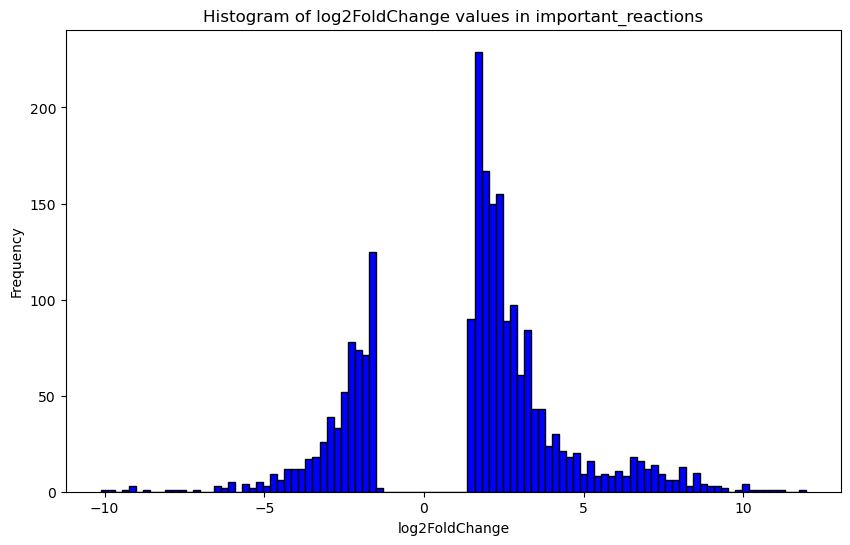

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

plt.hist(important_reactions['log2FoldChange'], bins=100, color='blue', edgecolor='black')

plt.xlabel('log2FoldChange')
plt.ylabel('Frequency')
plt.title('Histogram of log2FoldChange values in important_reactions')

plt.show()

In [24]:
important_reactions['genes'] = important_reactions['genes'].str.strip()
combined_ig_gene_df_start['genes'] = combined_ig_gene_df_start['genes'].str.strip()

# important_reactions = important_reactions.drop_duplicates(subset=['genes'], keep='first')
combined_ig_gene_df_start = combined_ig_gene_df_start.drop_duplicates(subset=['genes'], keep='first')
print(combined_ig_gene_df_start)
common_paths_start = pd.merge(important_reactions, combined_ig_gene_df_start, left_on='genes', right_on='genes', how='inner')
new_paths_gnn_start = combined_ig_gene_df_start[~combined_ig_gene_df_start['genes'].isin(important_reactions['genes'])]
exclusive_important_reactions = important_reactions[~important_reactions['genes'].isin(combined_ig_gene_df_start['genes'])]

print("Common Paths:")
print(common_paths_start.shape)
print("------------------------------------")
print("New Paths in GNN Results:")
print(new_paths_gnn_start.shape)
print("------------------------------------")
print("old Paths in GNN Results:")
print(exclusive_important_reactions.shape)

output_directory = "/Users/kejiyuan/Desktop/test/graph_analysis/" 

common_paths_start.to_csv(output_directory + 'common_paths_start.txt', sep='\t', index=False)

new_paths_gnn_start.to_csv(output_directory + 'new_paths_gnn_start.txt', sep='\t', index=False)

exclusive_important_reactions.to_csv(output_directory + 'old_paths_gea_start.txt', sep='\t', index=False)

          ig_0      ig_1         start           end               genes
0     0.614707  1.000000  R-MMU-114259  R-MMU-114252  ENSMUSG00000019979
1     0.614707  1.000000  R-MMU-114259  R-MMU-114252  ENSMUSG00000028914
2     0.614707  1.000000  R-MMU-114259  R-MMU-114252  ENSMUSG00000058927
3     0.614707  1.000000  R-MMU-114259  R-MMU-114252  ENSMUSG00000063694
4     0.614707  1.000000  R-MMU-114259  R-MMU-114252  ENSMUSP00000020157
...        ...       ...           ...           ...                 ...
8372  0.075990  0.120225  R-MMU-187575  R-MMU-187574  ENSMUSP00000130693
8385  0.075990  0.120225  R-MMU-187575  R-MMU-187574  ENSMUST00000029679
8394  0.075990  0.120225  R-MMU-187575  R-MMU-187574  ENSMUST00000108023
8395  0.075990  0.120225  R-MMU-187575  R-MMU-187574  ENSMUST00000108324
8407  0.075990  0.120225  R-MMU-187575  R-MMU-187574  ENSMUST00000170901

[3519 rows x 5 columns]
Common Paths:
(200, 11)
------------------------------------
New Paths in GNN Results:
(3319, 5)
--

/var/folders/tb/2kfnm5lx2x3gd90s0ytdlf300000gn/T/ipykernel_29928/3336116920.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  important_reactions['genes'] = important_reactions['genes'].str.strip()


In [21]:
combined_ig_gene_df_end = combined_ig_gene_df_end.drop_duplicates(subset=['genes'], keep='first')

common_paths_end = pd.merge(important_reactions, combined_ig_gene_df_end, left_on='genes', right_on='genes', how='inner')
new_paths_gnn_end = combined_ig_gene_df_end[~combined_ig_gene_df_end['genes'].isin(important_reactions['genes'])]
exclusive_important_reactions_end = important_reactions[~important_reactions['genes'].isin(combined_ig_gene_df_end['genes'])]

print("Common Paths:")
print(common_paths_end.shape)
print("------------------------------------")
print("New Paths in GNN Results:")
print(new_paths_gnn_end.shape)
print("------------------------------------")
print("old Paths in GNN Results:")
print(exclusive_important_reactions_end.shape)

output_directory = "/Users/kejiyuan/Desktop/test/graph_analysis/" 

common_paths_end.to_csv(output_directory + 'common_paths_end.txt', sep='\t', index=False)

new_paths_gnn_end.to_csv(output_directory + 'new_paths_gnn_end.txt', sep='\t', index=False)

exclusive_important_reactions_end.to_csv(output_directory + 'old_paths_gea_end.txt', sep='\t', index=False)

Common Paths:
(159, 11)
------------------------------------
New Paths in GNN Results:
(2482, 5)
------------------------------------
old Paths in GNN Results:
(1982, 7)


Common Paths:
(205, 11)
------------------------------------
New Paths in GNN Results:
(3459, 5)
------------------------------------
Old Paths in GEA Results:
(1936, 7)


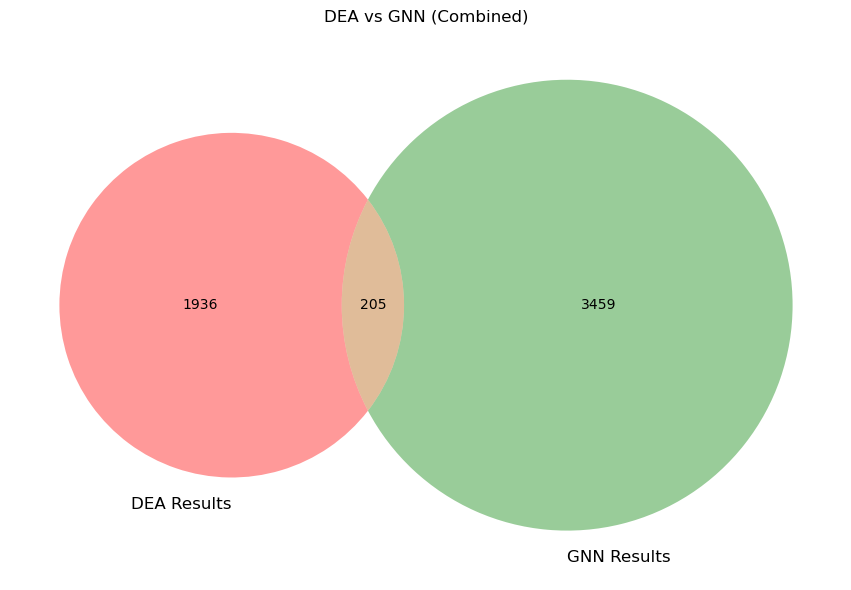

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

combined_ig_gene_df = pd.concat([combined_ig_gene_df_start, combined_ig_gene_df_end]).drop_duplicates(subset=['genes'], keep='first')

common_paths = pd.merge(important_reactions, combined_ig_gene_df, left_on='genes', right_on='genes', how='inner')
new_paths_gnn = combined_ig_gene_df[~combined_ig_gene_df['genes'].isin(important_reactions['genes'])]
exclusive_important_reactions = important_reactions[~important_reactions['genes'].isin(combined_ig_gene_df['genes'])]

print("Common Paths:")
print(common_paths.shape)
print("------------------------------------")
print("New Paths in GNN Results:")
print(new_paths_gnn.shape)
print("------------------------------------")
print("Old Paths in GEA Results:")
print(exclusive_important_reactions.shape)

output_directory = "/Users/kejiyuan/Desktop/test/graph_analysis/"

common_paths.to_csv(output_directory + 'common_paths_combined.txt', sep='\t', index=False)
new_paths_gnn.to_csv(output_directory + 'new_paths_gnn_combined.txt', sep='\t', index=False)
exclusive_important_reactions.to_csv(output_directory + 'old_paths_gea_combined.txt', sep='\t', index=False)

plt.figure(figsize=(10, 6))
venn2([set(important_reactions['genes']), set(combined_ig_gene_df['genes'])], ('DEA Results', 'GNN Results'))
plt.title('DEA vs GNN (Combined)')
plt.tight_layout()
output_path = '/Users/kejiyuan/Desktop/reticula/data/tcdd/output/DEA_vs_GNN_combined.pdf'
plt.savefig(output_path)
plt.show()



In [11]:
enrichment_reactome_df = "/Users/kejiyuan/Desktop/reticula/data/tcdd/output/enrichment_reactome_reactions_results.csv"
er_df = pd.read_csv(enrichment_reactome_df, sep=",")
print(er_df.head(n=5))
print(er_df.shape)

   Unnamed: 0        TermID  genes  all          pval          padj
0           5  R-MMU-380073    104  182  4.845895e-11  1.947907e-07
1           9  R-MMU-749454    102  178  5.947807e-11  1.947907e-07
2          10  R-MMU-749456    102  178  5.947807e-11  1.947907e-07
3         467  R-MMU-481007     48   71  4.831805e-09  1.186812e-05
4         461  R-MMU-382054     22   25  2.728026e-08  5.316991e-05
(9825, 6)


In [12]:
er_important_reactions = er_df[(er_df['padj'] < pvalue_threshold)]
print(er_important_reactions.head(n=5))
print(er_important_reactions.shape)
er_important_reactions = er_important_reactions.drop_duplicates(subset=['TermID'], keep='first')
print(er_important_reactions.shape)

   Unnamed: 0        TermID  genes  all          pval          padj
0           5  R-MMU-380073    104  182  4.845895e-11  1.947907e-07
1           9  R-MMU-749454    102  178  5.947807e-11  1.947907e-07
2          10  R-MMU-749456    102  178  5.947807e-11  1.947907e-07
3         467  R-MMU-481007     48   71  4.831805e-09  1.186812e-05
4         461  R-MMU-382054     22   25  2.728026e-08  5.316991e-05
(101, 6)
(101, 6)


(65, 4)
(65, 4)


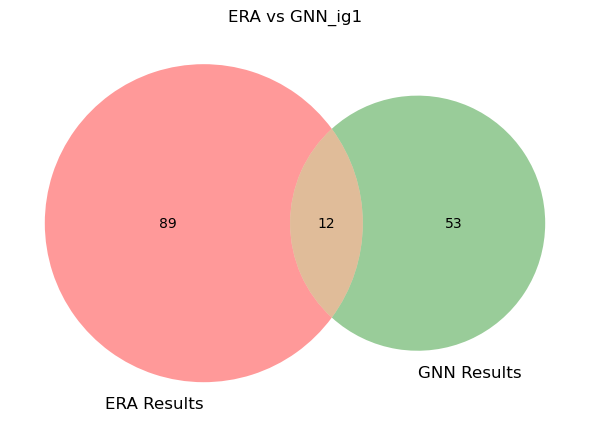

In [16]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

fig, ax = plt.subplots(1, 1, figsize=(6, 6))  # 修改为单个子图

print(top_1_percent_GNN.shape)

top_1_percent_GNN_start = top_1_percent_GNN.drop_duplicates(subset=['start'], keep="first")

print(top_1_percent_GNN_start.shape)

venn2([set(er_important_reactions['TermID']), set(top_1_percent_GNN_start['start'])], 
      ('ERA Results', 'GNN Results'), ax=ax)

ax.set_title('ERA vs GNN_ig1')

plt.tight_layout()

output_path = '/Users/kejiyuan/Desktop/reticula/data/tcdd/output/PEA_vs_GNN_ig1.pdf'
plt.savefig(output_path)

plt.show()


In [14]:
enrichment_reactome_df = "/Users/kejiyuan/Desktop/reticula/data/tcdd/output/enrichment_reactome_reactions_results.csv"
er_df = pd.read_csv(enrichment_reactome_df, sep=",")

term_ids = ["R-MMU-2993780", "R-MMU-6799246", "R-MMU-5693609"]

filtered_df = er_df[er_df['TermID'].isin(term_ids)]

for term_id, genes in zip(filtered_df['TermID'], filtered_df['genes']):
    print(f"TermID: {term_id}, Genes: {genes}")


TermID: R-MMU-6799246, Genes: 1
TermID: R-MMU-2993780, Genes: 0
TermID: R-MMU-5693609, Genes: 0


Overlap between ERA Results and GNN Results: {'R-MMU-8948222', 'R-MMU-1981157', 'R-MMU-8948219', 'R-MMU-749456', 'R-MMU-1981120', 'R-MMU-8948224', 'R-MMU-8948228', 'R-MMU-1981104', 'R-MMU-380073', 'R-MMU-749454', 'R-MMU-1981128', 'R-MMU-2002460'}


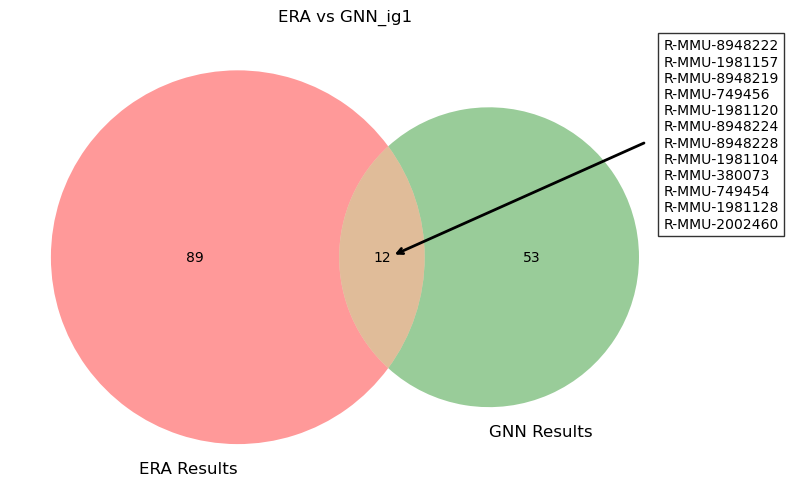

In [39]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

era_set = set(er_important_reactions['TermID'])
gnn_set = set(top_1_percent_GNN_start['start'])

overlap = era_set.intersection(gnn_set)
print("Overlap between ERA Results and GNN Results:", overlap)

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
venn = venn2([era_set, gnn_set], ('ERA Results', 'GNN Results'), ax=ax)

intersection_patch = venn.get_patch_by_id('11')  
intersection_coords = intersection_patch.get_path().vertices.mean(axis=0) 

overlap_text = "\n".join(overlap)  
text_x, text_y = 0.8, 0.3  
ax.text(text_x, text_y, overlap_text, fontsize=10, ha='left', va='center', bbox=dict(facecolor='white', alpha=0.8))

arrowprops = dict(arrowstyle="->", color="black", lw=2, shrinkA=15, shrinkB=15)
ax.annotate("", xy=intersection_coords, xytext=(text_x - 0.001, text_y), arrowprops=arrowprops)

ax.set_title('ERA vs GNN_ig1')

plt.tight_layout()

output_path = '/Users/kejiyuan/Desktop/reticula/data/tcdd/output/PEA_vs_GNN_ig1_arrow.pdf'
plt.savefig(output_path)
plt.show()
